In [43]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

In [44]:
df_statlog=pd.read_csv('capstone datasets/Heart Disease Statlog/Heart_disease_statlog.csv')

In [45]:
df_statlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [46]:
df_statlog.target.value_counts()

target
0    150
1    120
Name: count, dtype: int64

In [47]:
df_statlog.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


In [48]:
X=df_statlog.drop(labels='target',axis=1)
y=df_statlog['target']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Feature scaling

In [50]:
scaler=StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f'standard_features std is {X_train_scaled.std(axis=0)}')
print(f'standard_features mean is {X_train_scaled.mean(axis=0)}')
print(f'standard_features std is {X_test_scaled.std(axis=0)}')
print(f'standard_features mean is {X_test_scaled.mean(axis=0)}')

standard_features std is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
standard_features mean is [ 3.53626593e-16  2.87835599e-17  2.11764762e-16  7.56596432e-16
  1.31581988e-16 -6.57909941e-17  3.49514656e-17  3.96801933e-16
 -8.22387426e-18 -3.28954970e-17 -8.22387426e-18 -7.40148683e-17
 -3.49514656e-17]
standard_features std is [0.97896397 1.07127549 0.87248512 0.99156103 1.02724676 1.18132871
 1.00466848 1.0573535  0.89526742 0.83677485 1.03530409 0.90689267
 0.97401175]
standard_features mean is [-0.18150221 -0.23215748 -0.03335035 -0.11886603 -0.0481027   0.20369082
 -0.07447098  0.13123792 -0.23267002 -0.20293819 -0.09892011 -0.07725233
 -0.15424598]


#### Applying SVC model

### Set the parameters

In [51]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [52]:
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV accuracy 0.8291754756871036
Accuracy: 0.8703703703703703
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.82      0.86      0.84        21

    accuracy                           0.87        54
   macro avg       0.86      0.87      0.86        54
weighted avg       0.87      0.87      0.87        54



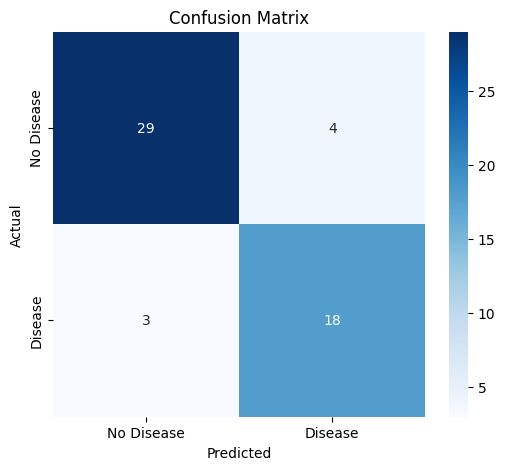

In [54]:
print("Best Parameters:", grid.best_params_)
print("Best CV accuracy", grid.best_score_)


svc_model = grid.best_estimator_
y_pred = svc_model.predict(X_test_scaled)


acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("Classification Report:\n", classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Accuracy of 87% meaning the model is performing well.